In [10]:
%run /Users/amandaoliphant/Documents/GitHub/ProteinComplexes/Analysis_Functions.ipynb

All files already downloaded and correct.
All files already downloaded and correct.
All files already downloaded and correct.
All files already downloaded and correct.


In [19]:
%run /Users/amandaoliphant/Documents/GitHub/ProteinComplexes/Plotting_Functions.ipynb

In [12]:
proteasome_proteins = subunitNames['PA700 complex'] + subunitNames['26S proteasome'] + subunitNames['20S proteasome'] + subunitNames['PA28-20S proteasome'] + subunitNames['PA700-20S-PA28 complex'] + subunitNames['PA28gamma-20S proteasome']
proteasome_proteins = list(set(proteasome_proteins))
sub_20s = []
sub_19s = []
pa28 = []
for protein in proteasome_proteins:
    if 'PSMA' in protein or 'PSMB' in protein: sub_20s.append(protein)
    elif 'PSMC' in protein or 'PSMD' in protein: sub_19s.append(protein)
    else: pa28.append(protein)  

### Proteasomal Proteins
Perform t-tests on tumor vs normal protein expression for the proteins within the proteasomal complexes

In [13]:
proteasome_proteins = subunitNames['PA700 complex'] + subunitNames['26S proteasome'] + subunitNames['20S proteasome'] + subunitNames['PA28-20S proteasome'] + subunitNames['PA700-20S-PA28 complex'] + subunitNames['PA28gamma-20S proteasome']
sig_results = []
# Remove duplicates
proteasome_proteins = list(set(proteasome_proteins))
# Bonferroni correction of the p-value
alpha = 0.05 / len(proteasome_proteins)
# Perform t-tests
for protein in proteasome_proteins:
    pval = ttest_proteomics(protein, cancer_type = 'renal')
    if pval < alpha:
        sig_results.append(protein)
        print('p-value for ' + protein + ' (tumor vs normal): ' + str(pval))

p-value for PSMA3 (tumor vs normal): 3.3596151852122616e-15
p-value for PSMD13 (tumor vs normal): 5.099960865958322e-11
p-value for PSMA5 (tumor vs normal): 1.0902638934181158e-45
p-value for PSMC4 (tumor vs normal): 4.3808103642083705e-11
p-value for PSMC1 (tumor vs normal): 1.2710442313103139e-21
p-value for PSMD7 (tumor vs normal): 0.0001676004700390654
p-value for PSMA1 (tumor vs normal): 3.3693262199345677e-41
p-value for PSMB2 (tumor vs normal): 2.7058434958094895e-25
p-value for PSMC5 (tumor vs normal): 9.296416688941852e-18
p-value for PSMB6 (tumor vs normal): 7.681187972974748e-35
p-value for PSMD2 (tumor vs normal): 3.502593824616743e-16
p-value for PSMD8 (tumor vs normal): 4.302746904867804e-10
p-value for PSMB5 (tumor vs normal): 9.929735523432744e-52
p-value for PSMD12 (tumor vs normal): 1.866229858762171e-43
p-value for PSME1 (tumor vs normal): 6.5048867616696516e-18
p-value for PSMB7 (tumor vs normal): 7.136134223818594e-15
p-value for PSMC2 (tumor vs normal): 5.28751667

#### Divide significant results into subunits of the proteasome

In [14]:
sub_20s = []
sub_19s = []
pa28 = []
for protein in sig_results:
    if 'PSMA' in protein or 'PSMB' in protein: sub_20s.append(protein)
    elif 'PSMC' in protein or 'PSMD' in protein: sub_19s.append(protein)
    else: pa28.append(protein) 
sub_20s.sort()
sub_19s.sort()
pa28.sort()

### 20S Proteasome

PSMA1: 3.3693262199345677e-41
PSMA2: 9.825638531490008e-36
PSMA3: 3.3596151852122616e-15
PSMA4: 1.1055756556547225e-08
PSMA5: 1.0902638934181158e-45
PSMA6: 3.305106647224924e-30
PSMA7: 8.626342903728362e-29
PSMB1: 3.132957138281067e-36
PSMB2: 2.7058434958094895e-25
PSMB3: 7.694520780417268e-05
PSMB4: 6.3912942632160186e-27
PSMB5: 9.929735523432744e-52
PSMB6: 7.681187972974748e-35
PSMB7: 7.136134223818594e-15


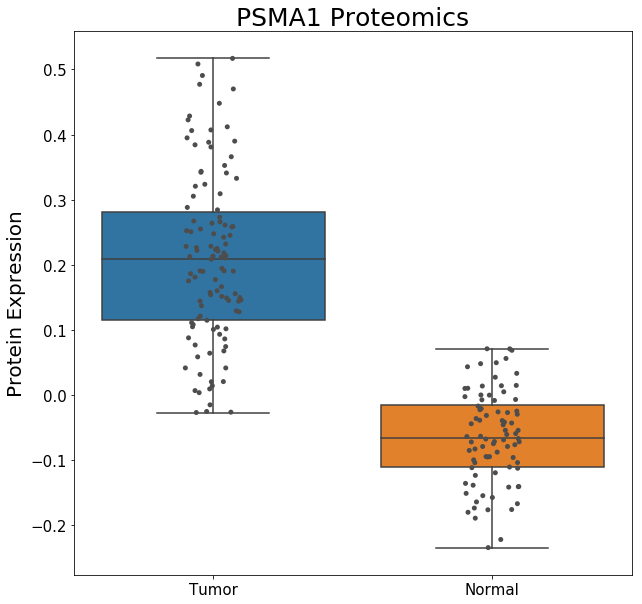

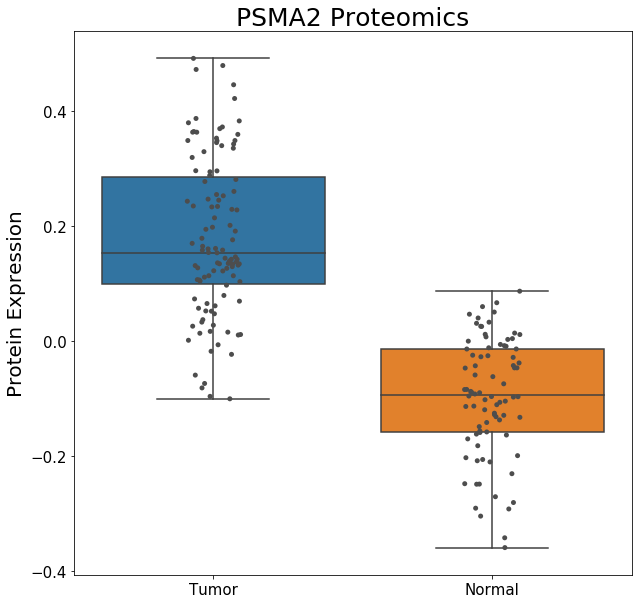

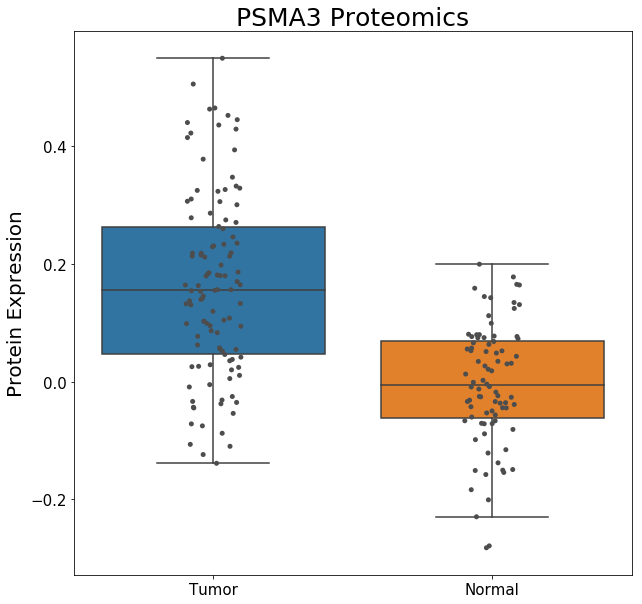

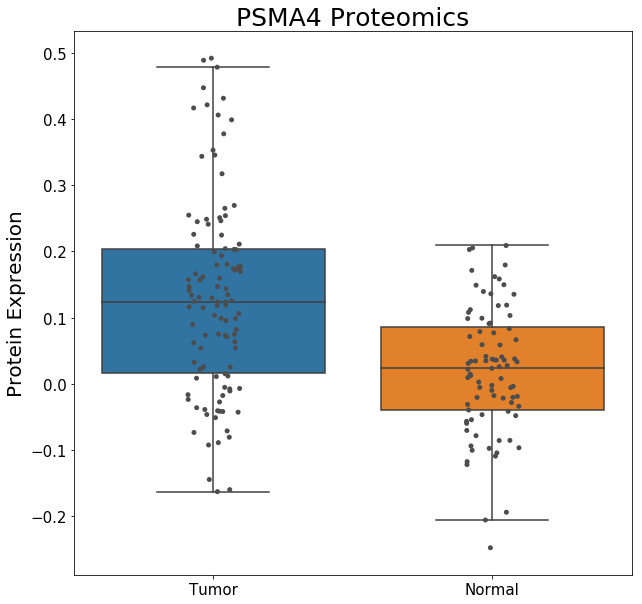

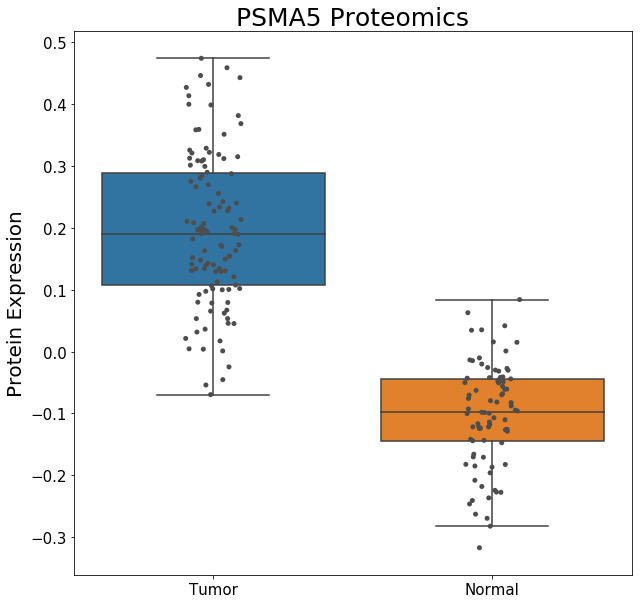

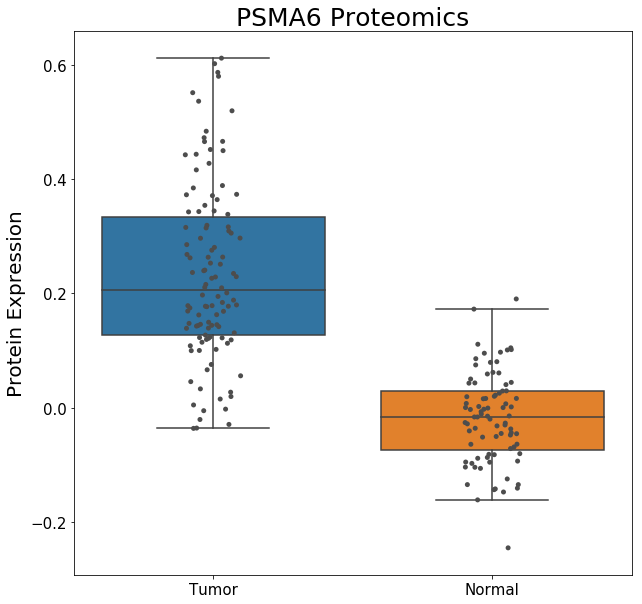

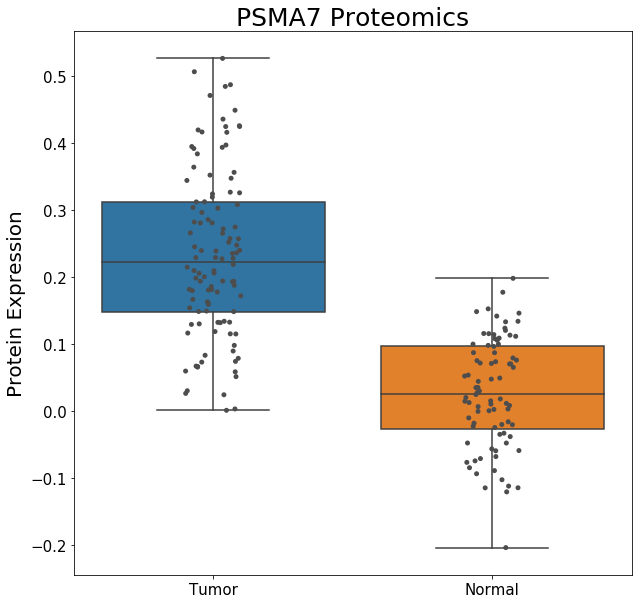

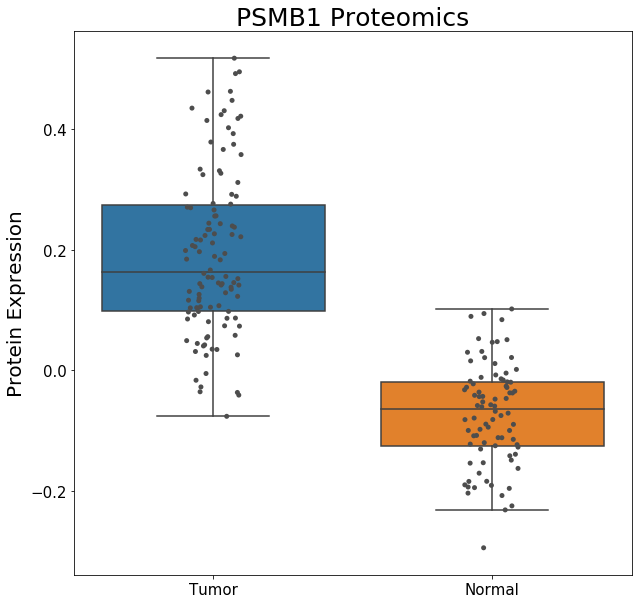

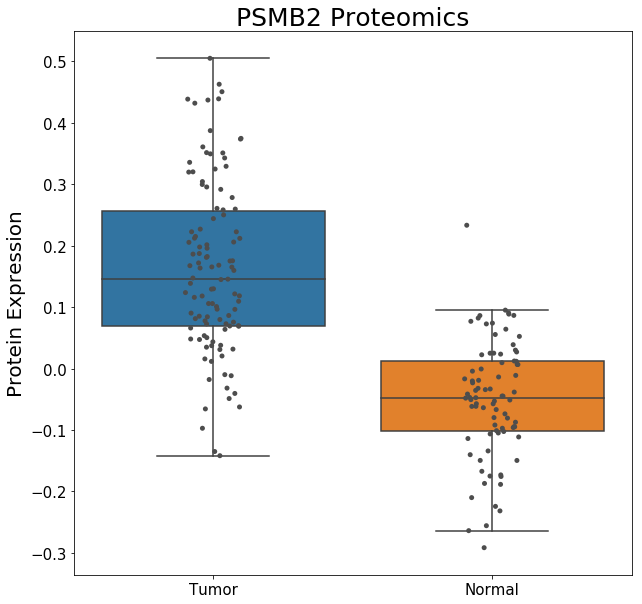

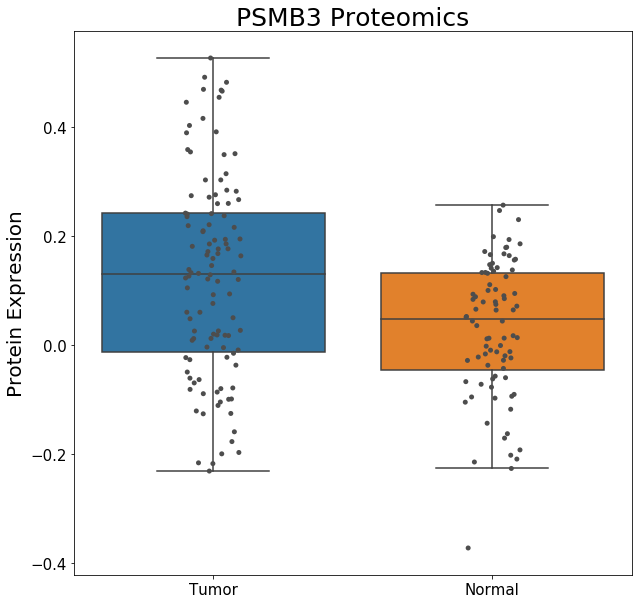

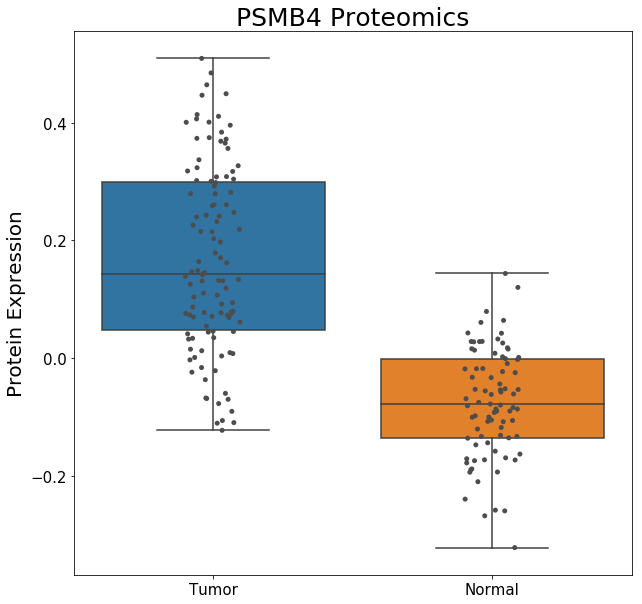

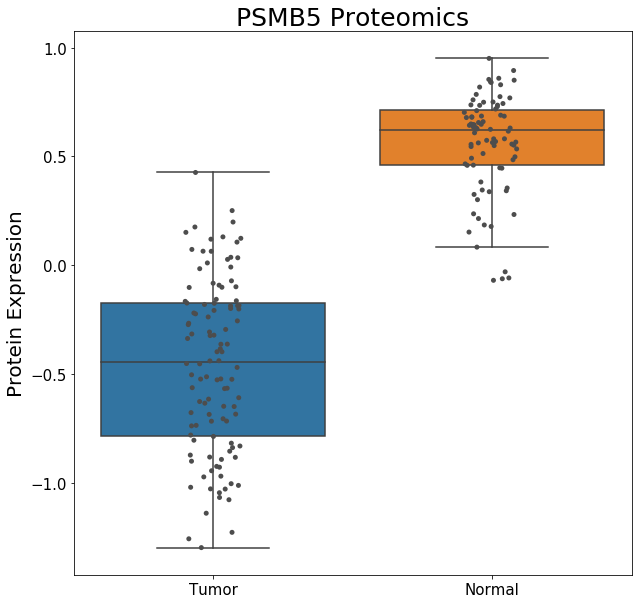

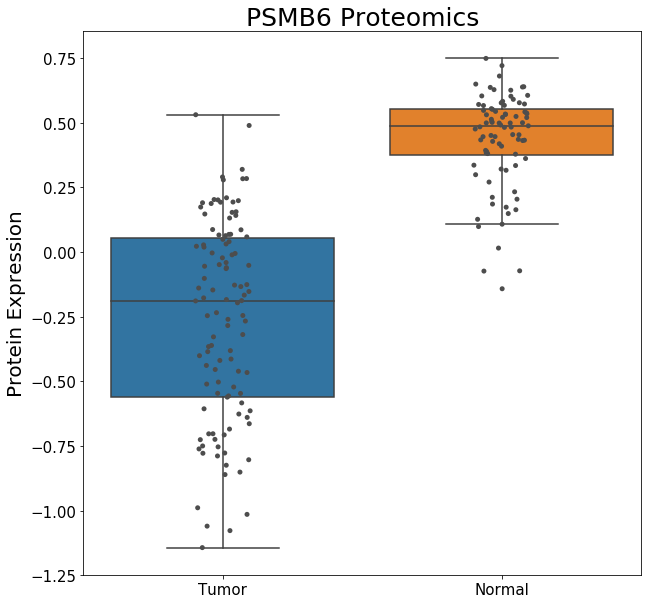

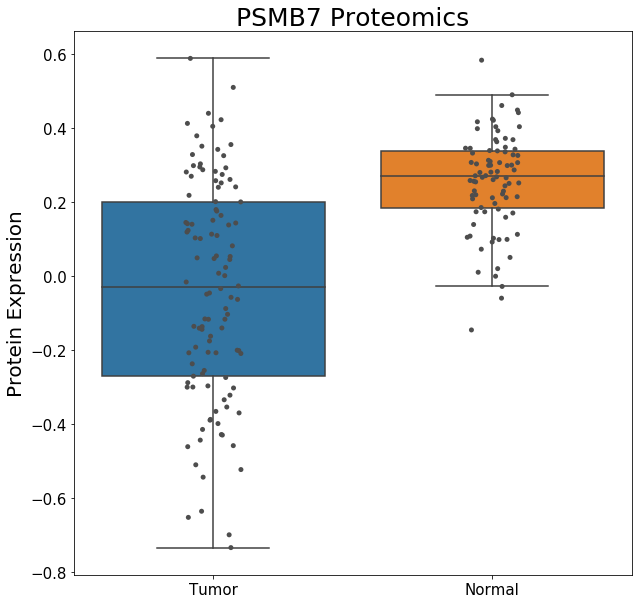

In [20]:
for protein in sub_20s:
    pval = ttest_proteomics(protein, cancer_type = 'renal')
    print(protein + ': ' + str(pval))
    plot_proteomics(protein, print_pvals = False, cancer_type = 'renal')

### 19S Regulatory Subunit (PA700)

PSMC1: 1.2710442313103139e-21
PSMC2: 5.287516677066785e-09
PSMC3: 2.199284071484954e-16
PSMC4: 4.3808103642083705e-11
PSMC5: 9.296416688941852e-18
PSMC6: 2.163510627130165e-15
PSMD1: 8.668663177157588e-05
PSMD10: 2.2081332851656324e-80
PSMD12: 1.866229858762171e-43
PSMD13: 5.099960865958322e-11
PSMD14: 9.647122129186854e-12
PSMD2: 3.502593824616743e-16
PSMD3: 1.8293829840685184e-13
PSMD4: 3.3887557274412226e-15
PSMD5: 1.0702608092315125e-14
PSMD6: 3.1081034370094277e-18
PSMD7: 0.0001676004700390654
PSMD8: 4.302746904867804e-10


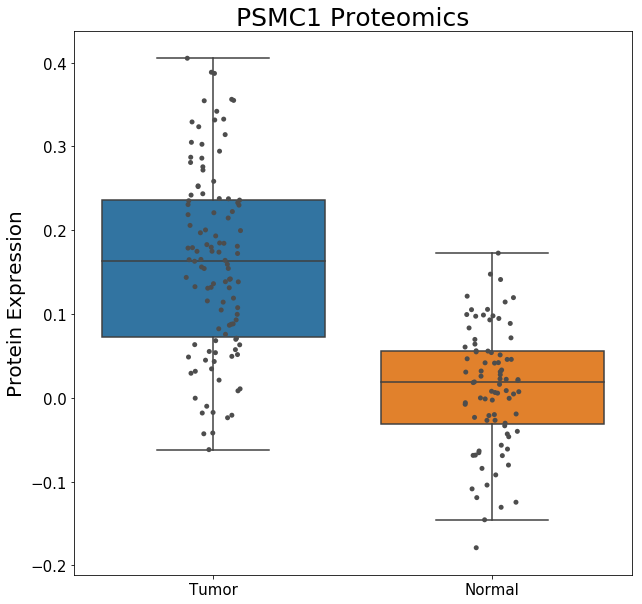

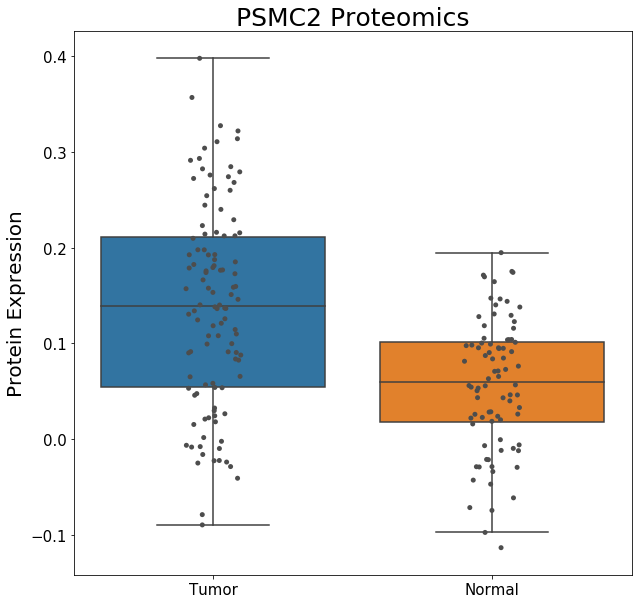

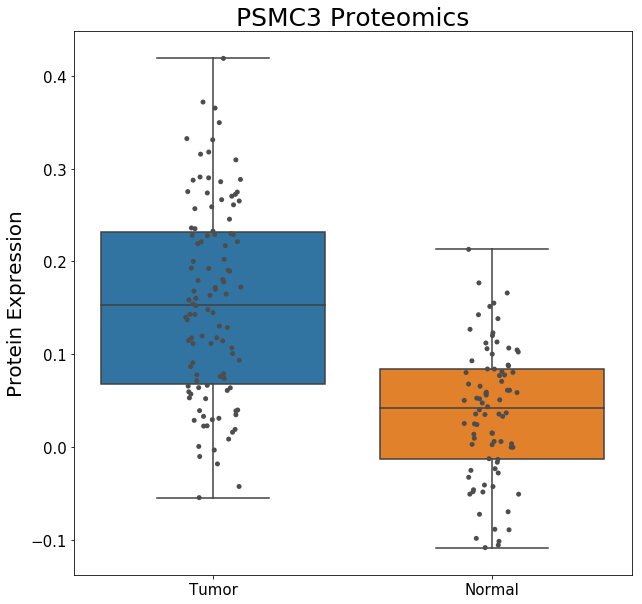

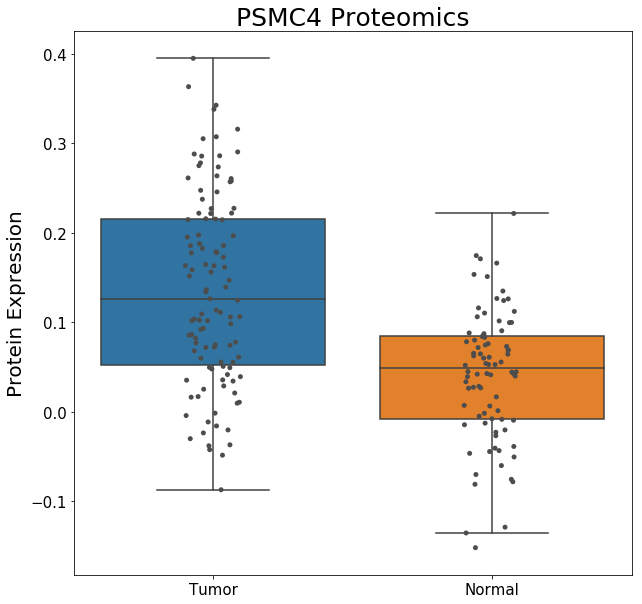

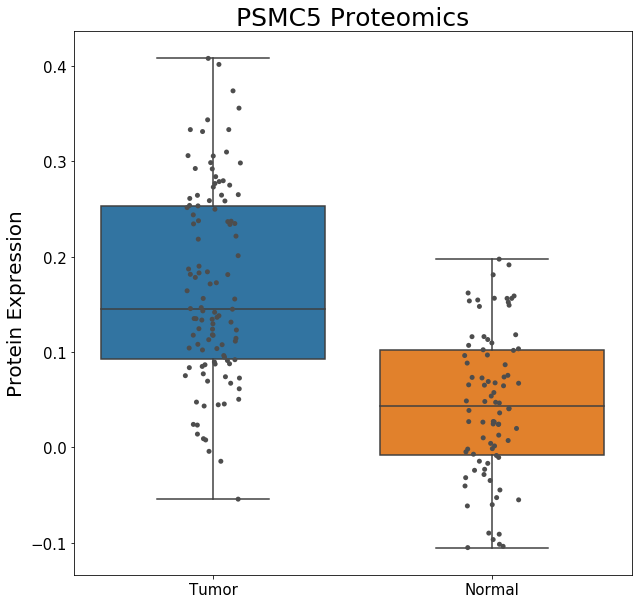

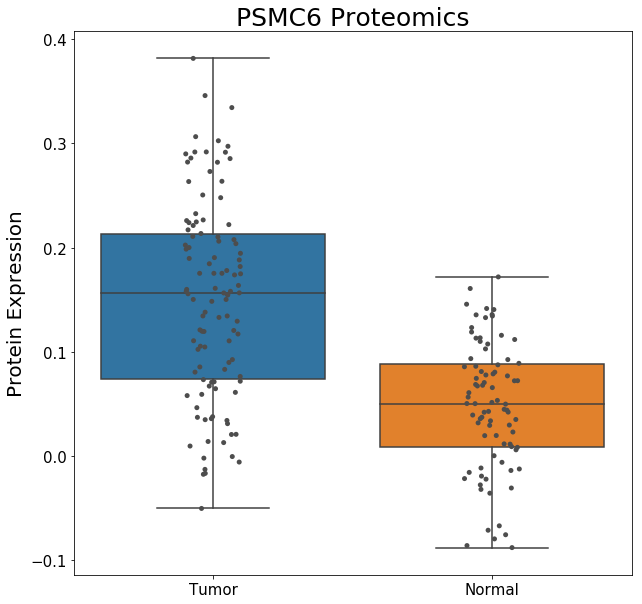

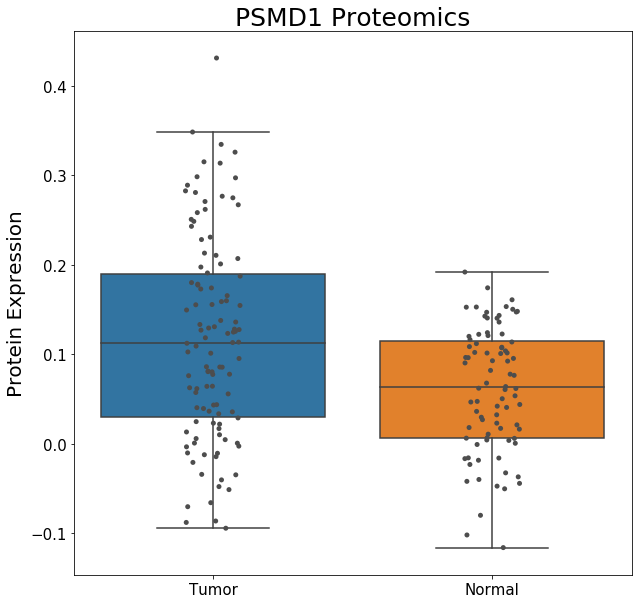

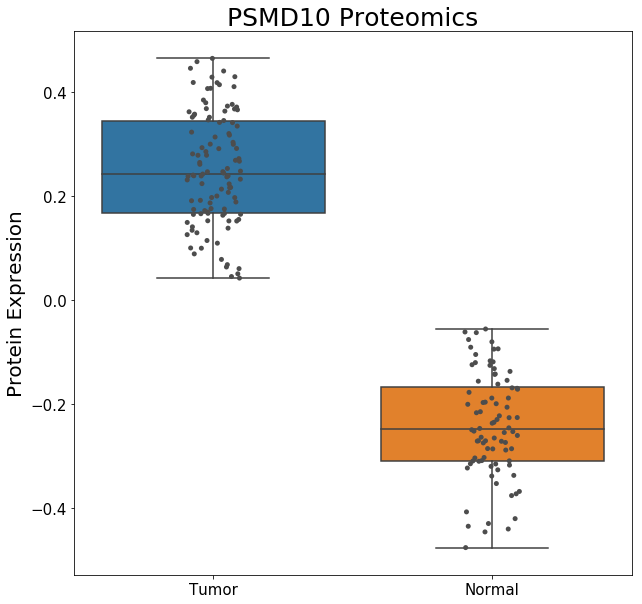

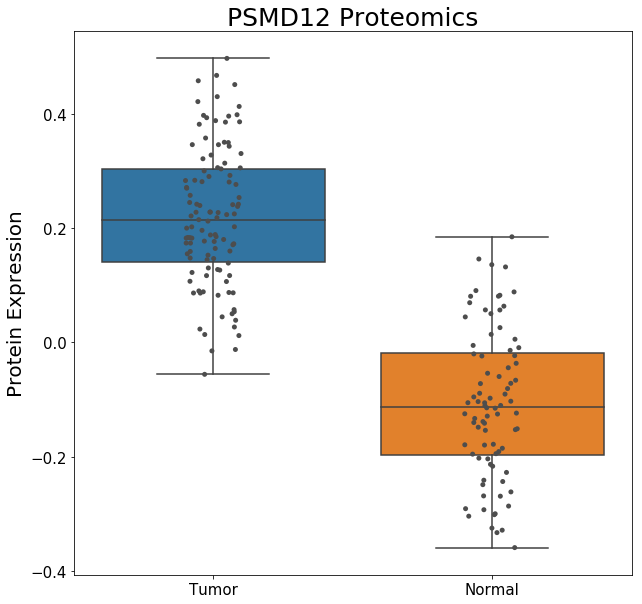

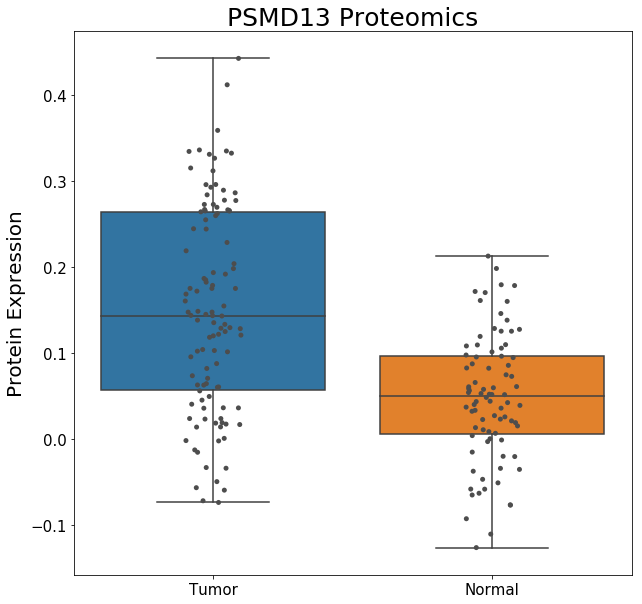

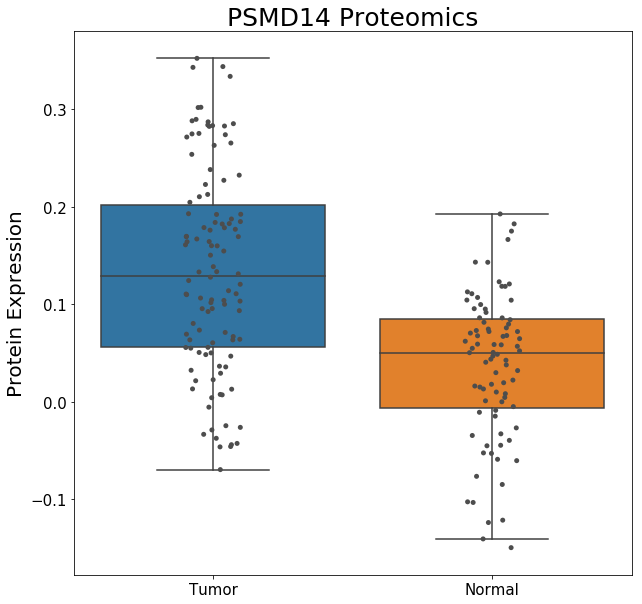

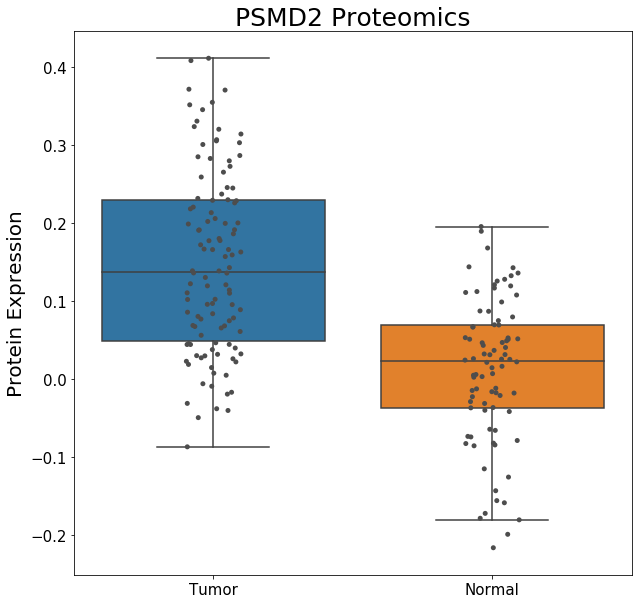

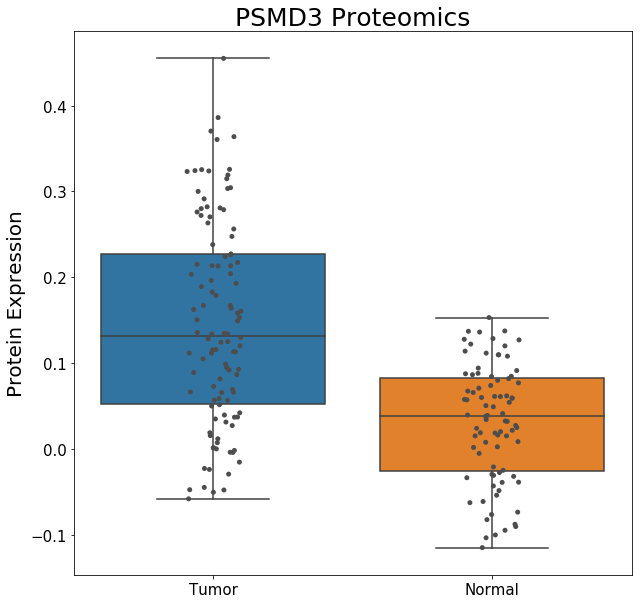

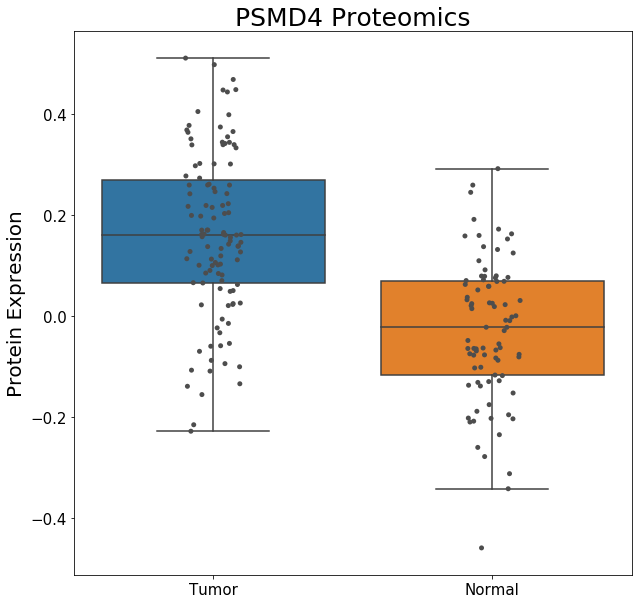

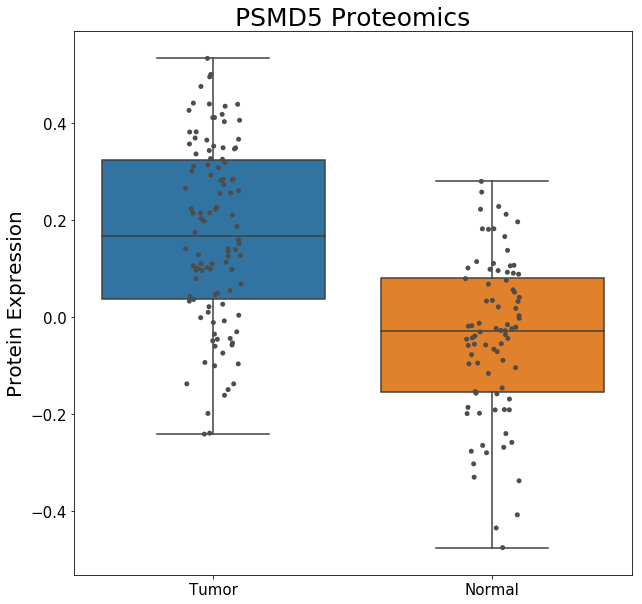

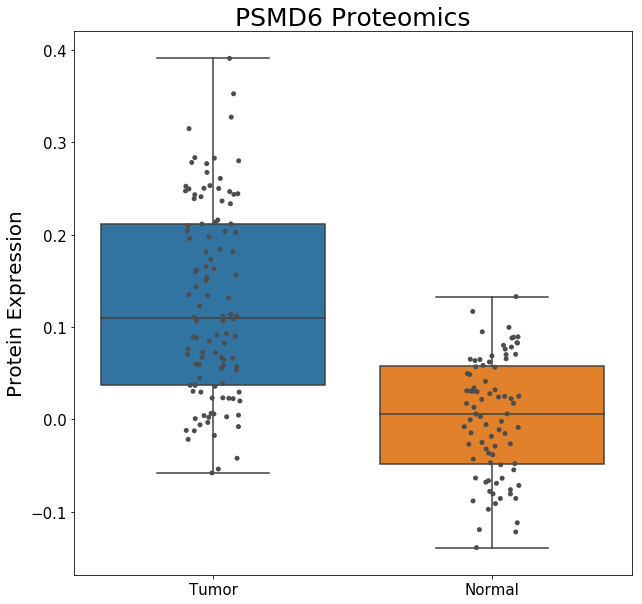

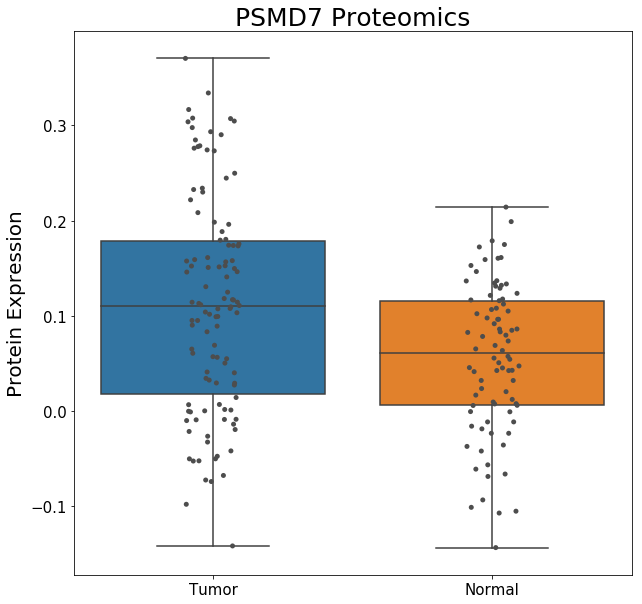

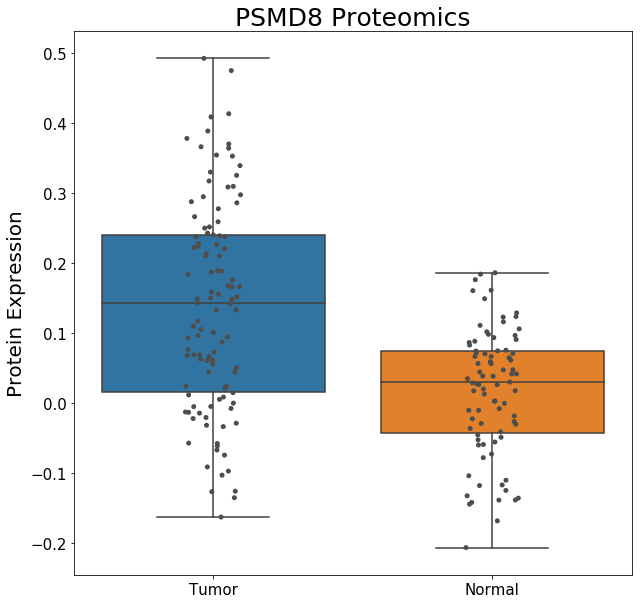

In [21]:
for protein in sub_19s:
    pval = ttest_proteomics(protein, cancer_type = 'renal')
    print(protein + ': ' + str(pval))
    plot_proteomics(protein, print_pvals = False, cancer_type = 'renal')

### PA28 (11S REG subunit)

PSME1: 6.5048867616696516e-18
PSME2: 1.57723370717163e-49
PSME3: 6.322321995452002e-13


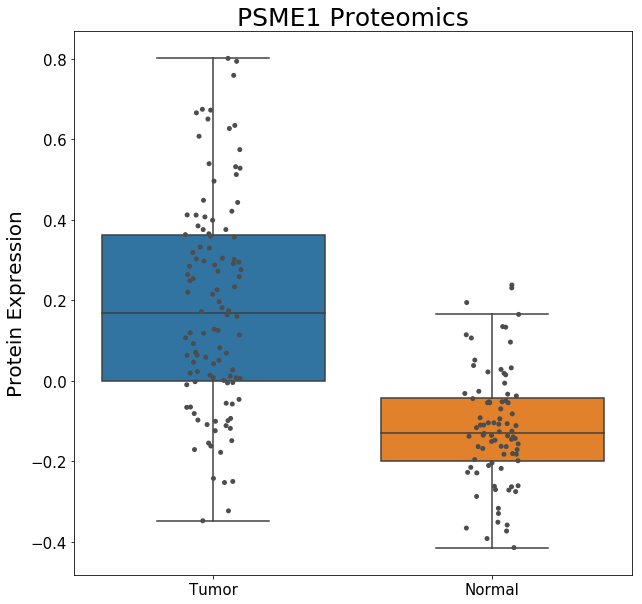

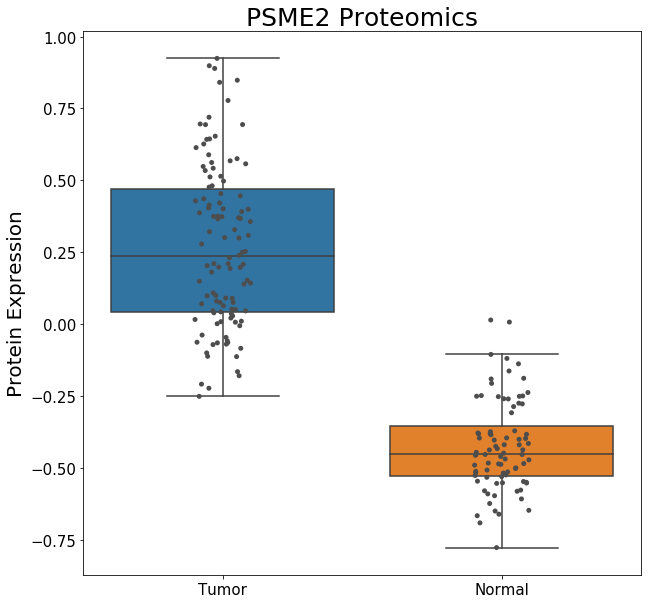

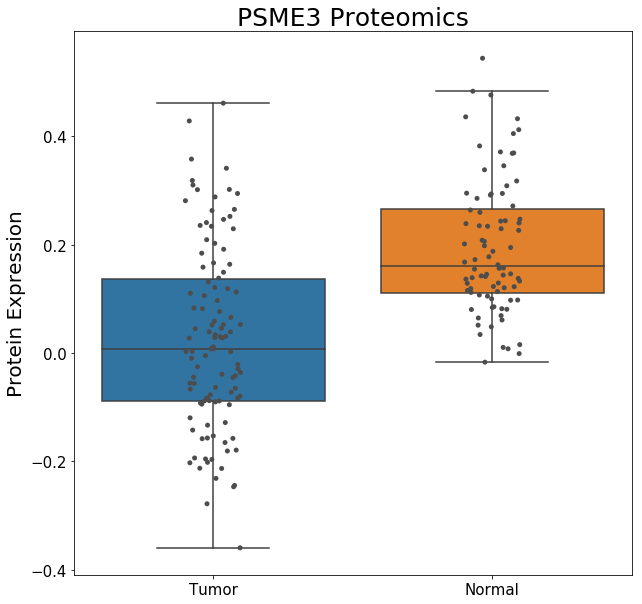

In [22]:
for protein in pa28:
    pval = ttest_proteomics(protein, cancer_type = 'renal')
    print(protein + ': ' + str(pval))
    plot_proteomics(protein, print_pvals = False, cancer_type = 'renal')